In [ ]:
bl.shape[1]

13

In [ ]:
from bs4 import BeautifulSoup
search_val='BHarat Seats'
text='screener.in'+search_val
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text, "lxml")



soup

NameError: ignored

In [ ]:
import pandas as pd
import requests
import bs4

In [ ]:
search_val='TCS'
text='screener.in'+search_val
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text, 
                         "html.parser") 

  
# Iterate through the object  
# and print it as a string. 
s=''
for i in range(7,len((soup.select('.kCrYT a')[0]).get('href'))):
  if (soup.select('.kCrYT a')[0]).get('href')[i]=='&':
    break
  s=s+(soup.select('.kCrYT a')[0]).get('href')[i]
pd.read_html(s)[1]
    

NameError: ignored

# **#Importing Data**


**Income Statement**

In [ ]:
url="https://www.screener.in/company/530233/#profit-loss"
pl=pd.read_html(url)[1].set_index('Unnamed: 0')
bl=pd.read_html(url)[6].set_index('Unnamed: 0')
cfs=pd.read_html(url)[7].set_index('Unnamed: 0')

pl


,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,TTM
Unnamed: 0,,,,,,,,,,,,,
Sales +,9.78,12.08,20.83,25.44,44.28,33.74,32.65,27.91,35.47,40.79,46.82,43.79,50.11
Expenses +,9.43,11.32,19.09,23.33,41.01,30.95,29.71,25.11,31.03,34.43,39.83,37.51,41.19
Operating Profit,0.35,0.76,1.74,2.11,3.27,2.79,2.94,2.80,4.44,6.36,6.99,6.28,8.92
OPM %,3.58%,6.29%,8.35%,8.29%,7.38%,8.27%,9.00%,10.03%,12.52%,15.59%,14.93%,14.34%,17.80%
Other Income,0.38,0.08,0.03,0.05,0.06,0.06,0.24,0.42,0.53,0.51,0.96,0.97,0.97
Interest,0.38,0.42,1.12,1.43,1.85,1.53,1.66,1.66,1.18,1.21,0.87,0.58,0.31
Depreciation,0.26,0.34,0.44,0.47,0.72,0.74,0.72,0.68,0.86,0.93,1.01,1.02,0.99
Profit before tax,0.09,0.08,0.21,0.26,0.76,0.58,0.80,0.88,2.93,4.73,6.07,5.65,8.59
Tax %,11.11%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,72.01%,25.16%,27.51%,27.96%,NaN


Income Statement

In [ ]:
pl=pl.transpose()

# **#Cleaning and Reshaping Data**

In [ ]:
pl.head()

Unnamed: 0,Sales +,Expenses +,Operating Profit,OPM %,Other Income,Interest,Depreciation,Profit before tax,Tax %,Net Profit,EPS in Rs,Dividend Payout %
Mar 2010,233,190,42,18%,4,10,7,29,36%,19,5.33,5%
Mar 2011,437,344,93,21%,2,17,19,59,33%,39,11.12,2%
Mar 2012,1190,926,264,22%,3,59,44,164,34%,108,30.69,1%
Mar 2013,1919,1446,473,25%,7,115,76,290,17%,241,68.47,0%
Mar 2014,2384,1859,525,22%,18,201,100,242,23%,186,52.70,1%


In [ ]:
reset_names=["Sales\xa0+","Expenses\xa0+",'Operating Profit','OPM%','Other Income','Profit before tax','Net Profit']


In [ ]:
l1=['sales','expenses','opt','opm','oi','pbt','pat']
x=0
for i in reset_names:

  
  pl.rename(columns={i:l1[x]},inplace=True)
  x=x+1

In [ ]:
pl.rename(columns={'OPM %':'opm'},inplace=True)
pl.head()

Unnamed: 0,sales,expenses,opt,opm,oi,Interest,Depreciation,pbt,Tax %,pat,EPS in Rs,Dividend Payout %
Mar 2010,233,190,42,18%,4,10,7,29,36%,19,5.33,5%
Mar 2011,437,344,93,21%,2,17,19,59,33%,39,11.12,2%
Mar 2012,1190,926,264,22%,3,59,44,164,34%,108,30.69,1%
Mar 2013,1919,1446,473,25%,7,115,76,290,17%,241,68.47,0%
Mar 2014,2384,1859,525,22%,18,201,100,242,23%,186,52.70,1%


In [ ]:
change_datatype=['sales','expenses','opt','oi','Interest'	,'Depreciation', 'pbt', 'pat']	

In [ ]:

for i in change_datatype:
  pl[i] = pd.to_numeric(pl[i])


In [ ]:
['Agro Chemicals','Air Transport Service','Alcoholic Beverages','Auto Ancillaries','Auto Mobile','Banks','Bearings','Cables','Capital Goods- Electrical Equipments','Capital Goods- Electrical Equipments','Castings, Forgings and Fastners','Cement','Ceramic-Products','Chemicals','Computer Education','Construction','Credit Rating Agencies','Crude Oil and Natural Gas','Jewellery','Dry Cells','E-commerce','Edible Oil','Education','Electronics','Engineering','Entertainment','ETF','Ferro Alloys','Fertilizers','Finance','FMCG','Gas Distribution','Glass Products','Healthcare','Hotels  Restaurants','Infrastructure Developers','Infrastructure Investment Trusts','Insurance','IT-Hardware','IT-Software','Leather','Logistics','Marine Port and Services','Media-Print/Television/Radio','Mining and Mineral Products','Miscellaneous']

Unnamed: 0,sales,expenses,opt,opm,oi,Interest,Depreciation,pbt,Tax %,pat,EPS in Rs,Dividend Payout %
Mar 2010,233,190,42,18%,4,10,7,29,36%,19,5.33,5%
Mar 2011,437,344,93,21%,2,17,19,59,33%,39,11.12,2%
Mar 2012,1190,926,264,22%,3,59,44,164,34%,108,30.69,1%
Mar 2013,1919,1446,473,25%,7,115,76,290,17%,241,68.47,0%
Mar 2014,2384,1859,525,22%,18,201,100,242,23%,186,52.70,1%
Mar 2015,2762,2075,687,25%,7,354,206,133,34%,88,7.48,1%
Mar 2016,4206,3225,981,23%,16,519,200,277,17%,230,19.62,0%
Mar 2017,5227,4067,1160,22%,12,555,245,372,4%,358,26.15,4%
Mar 2018,7891,6420,1472,19%,41,590,292,631,10%,578,42.23,2%
Mar 2019,9403,7639,1765,19%,46,872,362,577,6%,552,40.38,2%


In [ ]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Mar 2010 to TTM
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sales              12 non-null     int64 
 1   expenses           12 non-null     int64 
 2   opt                12 non-null     int64 
 3   opm                12 non-null     object
 4   oi                 12 non-null     int64 
 5   Interest           12 non-null     int64 
 6   Depreciation       12 non-null     int64 
 7   pbt                12 non-null     int64 
 8   Tax %              11 non-null     object
 9   pat                12 non-null     int64 
 10  EPS in Rs          12 non-null     object
 11  Dividend Payout %  11 non-null     object
dtypes: int64(8), object(4)
memory usage: 1.5+ KB


In [ ]:
pl.rename(columns={'OPM %':'opm'},inplace=True)
pl.head()

Unnamed: 0,sales,expenses,opt,opm,oi,Interest,Depreciation,pbt,Tax %,pat,EPS in Rs,Dividend Payout %
Mar 2010,233,190,42,18%,4,10,7,29,36%,19,5.33,5%
Mar 2011,437,344,93,21%,2,17,19,59,33%,39,11.12,2%
Mar 2012,1190,926,264,22%,3,59,44,164,34%,108,30.69,1%
Mar 2013,1919,1446,473,25%,7,115,76,290,17%,241,68.47,0%
Mar 2014,2384,1859,525,22%,18,201,100,242,23%,186,52.70,1%


In [ ]:
#Balance Sheet

**Balance Sheet**

In [ ]:
bl=bl.transpose()
bl.head()

Unnamed: 0,Share Capital +,Reserves,Borrowings,Other Liabilities +,Total Liabilities,Fixed Assets +,CWIP,Investments,Other Assets +,Total Assets
Mar 2010,35,40,100,72,247,133,20,0,93,247
Mar 2011,35,78,308,126,547,261,0,0,285,547
Mar 2012,59,236,881,253,1405,566,125,0,713,1405
Mar 2013,59,476,1364,521,2395,674,531,0,1191,2395
Mar 2014,59,660,2044,829,3568,1282,491,0,1796,3568


In [ ]:
b_reset_names=['Share Capital\xa0+','Other Liabilities\xa0+','Total Liabilities','Fixed Assets\xa0+','CWIP','Other Assets\xa0+','Total Assets']
new_names=['sharecap','otl','tl','nfa','cwip','oa','ta']

In [ ]:
for i in range(7):
  bl.rename(columns={b_reset_names[i]:new_names[i]},inplace=True)

In [ ]:
bl.rename(columns={'ol':'otl'},inplace=True)
bl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Mar 2010 to Sep 2020
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sharecap     12 non-null     int64
 1   Reserves     12 non-null     int64
 2   Borrowings   12 non-null     int64
 3   otl          12 non-null     int64
 4   tl           12 non-null     int64
 5   nfa          12 non-null     int64
 6   cwip         12 non-null     int64
 7   Investments  12 non-null     int64
 8   oa           12 non-null     int64
 9   ta           12 non-null     int64
dtypes: int64(10)
memory usage: 1.0+ KB


In [ ]:
#Cash Flow Statement

**`Cash Flow Statement`**

In [ ]:
bl

Unnamed: 0,sharecap,Reserves,Borrowings,otl,tl,nfa,cwip,Investments,oa,ta
Mar 2010,35,40,100,72,247,133,20,0,93,247
Mar 2011,35,78,308,126,547,261,0,0,285,547
Mar 2012,59,236,881,253,1405,566,125,0,713,1405
Mar 2013,59,476,1364,521,2395,674,531,0,1191,2395
Mar 2014,59,660,2044,829,3568,1282,491,0,1796,3568
Mar 2015,117,688,3512,1276,5593,2193,415,0,2985,5593
Mar 2016,117,815,3630,1714,6276,1655,0,0,4621,6276
Mar 2017,137,1582,4230,2071,8019,1967,460,0,5592,8019
Mar 2018,137,2139,4949,3351,10575,2044,1623,0,6909,10575
Mar 2019,137,2669,7406,4227,14439,3031,2736,68,8604,14439


In [ ]:
cfs=cfs.transpose()

In [ ]:
cfs_reset_names=['Cash from Operating Activity\xa0+','Cash from Investing Activity\xa0+','Cash from Financing Activity\xa0+','Net Cash Flow']
cf_new_names=['cfo','cfi','cff','ncf']

In [ ]:
for i in range(4):

  cfs.rename(columns={cfs_reset_names[i]:cf_new_names[i]},inplace=True)

In [ ]:
cfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Mar 2010 to Mar 2020
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cfo     11 non-null     int64
 1   cfi     11 non-null     int64
 2   cff     11 non-null     int64
 3   ncf     11 non-null     int64
dtypes: int64(4)
memory usage: 440.0+ bytes


In [ ]:
#Debt & Stability Ratios

In [ ]:
cfs


Unnamed: 0,cfo,cfi,cff,ncf
Mar 2010,3,-8,5,1
Mar 2011,13,-12,2,3
Mar 2012,96,-472,423,48
Mar 2013,172,-586,373,-41
Mar 2014,177,-664,505,18
Mar 2015,376,-1038,856,194
Mar 2016,269,-171,-248,-151
Mar 2017,614,-1007,440,47
Mar 2018,1299,-1518,350,132
Mar 2019,1169,-2512,1569,227


# **#Concatenating Data and Re-Indexing**

In [ ]:
interest_covg= pl.opt/pl.Interest
interest_covg=interest_covg.round(2)
bl.rename(columns={'sharecapital':'sharecap'},inplace=True)

In [ ]:
debt_equity=(bl.Borrowings)/(bl.sharecap+bl.Reserves)
debt_equity=debt_equity.round(2)


In [ ]:
current_ratio=bl.oa/(bl.otl)
current_ratio=current_ratio.round(2)
crr=list(current_ratio)+[None]



In [ ]:
workingcap_sales=(bl.oa-bl.otl)/pl.sales
workingcap_sales=(workingcap_sales*100).round(2)
workingcap_sales=((workingcap_sales).apply(str))+'%'


In [ ]:
indx=list((interest_covg.index))

In [ ]:
s1 = pd.Series(list(interest_covg), index=indx, name='interest_covg')
s2 = pd.Series(list(debt_equity)+[None], index=indx, name='debt_equity')
s3 = pd.Series(crr, index=indx, name='current_ratio')
s4 = pd.Series(list(workingcap_sales), index=indx, name='workingcap_sales')

ValueError: ignored

**Debt and Stability Raios**

In [ ]:
debt_equity[-1]

2.7

In [ ]:
df_stability=pd.concat([s1, s2,s3,s4], axis=1).transpose()


df_stability

NameError: ignored

**Margins**

In [ ]:
#Margins as a % of sales

In [ ]:
opm= (((pl.opt/pl.sales)*100).round(2)).apply(str)+'%'
npm= (((pl.pat/pl.sales)*100).round(2)).apply(str)+'%'
pbt=(((pl.pbt/pl.sales)*100).round(2)).apply(str)+'%'
ebd=(((pl.pbt-pl.Depreciation/pl.sales)*100).round(2)).apply(str)+'%'


In [ ]:
indx=list(pl.index)
x1 = pd.Series(list(opm), index=indx, name='OPM%')
x2 = pd.Series(list(pbt), index=indx, name='PBT%')
x3 = pd.Series(list(npm), index=indx, name='NPM%')

In [ ]:
df_margins=pd.concat([x1, x2,x3], axis=1).transpose()


df_margins

,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,TTM
OPM%,18.03%,21.28%,22.18%,24.65%,22.02%,24.87%,23.32%,22.19%,18.65%,18.77%,21.32%,21.77%
PBT%,12.45%,13.5%,13.78%,15.11%,10.15%,4.82%,6.59%,7.12%,8.0%,6.14%,5.87%,6.07%
NPM%,8.15%,8.92%,9.08%,12.56%,7.8%,3.19%,5.47%,6.85%,7.32%,5.87%,3.69%,3.18%


In [ ]:
#DU Ponts analysis

In [ ]:
nfat=(pl.sales/bl.nfa).round(2)

In [ ]:
lvg=(bl.ta/(bl.sharecap+bl.Reserves)).round(2)
lvg=list(lvg)+[0]


In [ ]:
roe=(((nfat* lvg * (pl.pat/pl.sales))*100).round(2).apply(str) )+'%'

In [ ]:
indx=list(pl.index)
x1 = pd.Series(list(nfat), index=indx, name='Asset_Turnover')
x2 = pd.Series(lvg, index=indx, name='Leverage_ratio')
x3 = pd.Series(list(npm), index=indx, name='NPM%')
x4 = pd.Series(list(roe), index=indx, name='ROE%')



ValueError: ignored

In [ ]:
df_dupont=pd.concat([x1, x2,x3,x4], axis=1).transpose()


df_dupont

NameError: ignored

In [ ]:
#Yearly growth rate

In [ ]:
sales=[]
pbt=[]
opt=[]
pat=[]
indx=list(pl.index)
for i in range(1,len(indx)):
  sales.append(str((((pl.sales[i]/pl.sales[i-1])-1)*100).round(2))+'%')
  opt.append(str((((pl.opt[i]/pl.opt[i-1])-1)*100).round(2))+'%')
  pbt.append(str((((pl.pbt[i]/pl.pbt[i-1])-1)*100).round(2))+'%')
  pat.append(str((((pl.pat[i]/pl.pat[i-1]-1))*100).round(2))+'%')
indx.pop()

'TTM'

In [ ]:







x1 = pd.Series(sales, index=indx, name='Sales_growth')
x2 = pd.Series(pbt, index=indx, name='PBT_growth')
x3 = pd.Series(pat, index=indx, name='PAT_growth') 
x4= pd.Series(opt, index=indx, name='OPT_growth')


**Growth Rates**

In [ ]:






df_ygrowth=pd.concat([x1,x4, x2,x3], axis=1).transpose()


df_ygrowth

,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020
Sales_growth,87.55%,172.31%,61.26%,24.23%,15.86%,52.28%,24.27%,50.97%,19.16%,3.17%,0.63%
OPT_growth,121.43%,183.87%,79.17%,10.99%,30.86%,42.79%,18.25%,26.9%,19.9%,17.17%,2.76%
PBT_growth,103.45%,177.97%,76.83%,-16.55%,-45.04%,108.27%,34.3%,69.62%,-8.56%,-1.39%,4.22%
PAT_growth,105.26%,176.92%,123.15%,-22.82%,-52.69%,161.36%,55.65%,61.45%,-4.5%,-35.14%,-13.41%


In [ ]:


#compounded average growth rates

In [ ]:
#2010-2020(10 year growth)

In [ ]:
cagr_indx=['10 Years', ' 5 Years', '3 Years']

In [ ]:
#10 year CAGR
s_cagr10= (pl.sales.loc['Mar 2020']/pl.sales.loc['Mar 2010'])**(1/10)-1
opt_cagr10= (pl.opt.loc['Mar 2020']/pl.opt.loc['Mar 2010'])**(1/10)-1
pbt_cagr10= (pl.pbt.loc['Mar 2020']/pl.pbt.loc['Mar 2010'])**(1/10)-1
pat_cagr10= (pl.pat.loc['Mar 2020']/pl.pat.loc['Mar 2010'])**(1/10)-1

s_cagr10=str((s_cagr10*100).round(2))+'%'
opt_cagr10=str((opt_cagr10*100).round(2))+'%'
pbt_cagr10=str((pbt_cagr10*100).round(2))+'%'
pat_cagr10=str((pat_cagr10*100).round(2))+'%'

In [ ]:

#5 year CAGR
s_cagr5= (pl.sales.loc['Mar 2020']/pl.sales.loc['Mar 2015'])**(1/5)-1
opt_cagr5= (pl.opt.loc['Mar 2020']/pl.opt.loc['Mar 2015'])**(1/5)-1
pbt_cagr5= (pl.pbt.loc['Mar 2020']/pl.pbt.loc['Mar 2015'])**(1/5)-1
pat_cagr5= (pl.pat.loc['Mar 2020']/pl.pat.loc['Mar 2015'])**(1/5)-1

s_cagr5=str((s_cagr5*100).round(2))+'%'
opt_cagr5=str((opt_cagr5*100).round(2))+'%'

pbt_cagr5=str((pbt_cagr5*100).round(2))+'%'
pat_cagr5=str((pat_cagr5*100).round(2))+'%'

In [ ]:


#3 year CAGR
s_cagr3= (pl.sales.loc['Mar 2020']/pl.sales.loc['Mar 2017'])**(1/3)-1
opt_cagr3= (pl.opt.loc['Mar 2020']/pl.opt.loc['Mar 2017'])**(1/3)-1
pbt_cagr3= (pl.pbt.loc['Mar 2020']/pl.pbt.loc['Mar 2017'])**(1/3)-1
pat_cagr3= (pl.pat.loc['Mar 2020']/pl.pat.loc['Mar 2017'])**(1/3)-1

s_cagr3=str((s_cagr3*100).round(2))+'%'
opt_cagr3=str((opt_cagr3*100).round(2))+'%'
pbt_cagr3=str((pbt_cagr3*100).round(2))+'%'
pat_cagr3=str((pat_cagr3*100).round(2))+'%'

In [ ]:








z1 = pd.Series([s_cagr10,s_cagr5,s_cagr3], index=cagr_indx, name='Sales Growth%')
z2 = pd.Series([opt_cagr10,opt_cagr5,opt_cagr3], index=cagr_indx, name='OPT Growth%')
z3 = pd.Series([pbt_cagr10,pbt_cagr5,pbt_cagr3], index=cagr_indx, name='PBT Growth%')
z4 = pd.Series([pat_cagr10,pat_cagr5,pat_cagr3], index=cagr_indx, name='PAT Growth%')

**Periodic Growth Rates**

In [ ]:
df_cagr =pd.concat([z1, z2,z3,z4], axis=1).transpose()
df_cagr

,10 Years,5 Years,3 Years
Sales Growth%,45.19%,28.56%,22.89%
OPT Growth%,47.65%,24.66%,21.25%
PBT Growth%,34.67%,33.74%,15.22%
PAT Growth%,34.13%,32.4%,0.0%


In [ ]:
#Capital Allocation

In [ ]:
indx=list(pl.index)
nfat= (pl.sales/bl.nfa).round(2)
rofa=(((pl.pat/bl.nfa)*100).round(2)).apply(str)+'%'
debt=[]
assets=[]
for i in range(1,len(indx)-1):
  debt.append(str((((bl.Borrowings[i]/bl.Borrowings[i-1])-1)*100).round(2))+'%')
  assets.append(str((((bl.nfa[i]/bl.nfa[i-1])-1)*100).round(2))+'%')



**Debt and Stability Raios**

In [ ]:
df_capal =pd.concat([u1, u2], axis=1).transpose()
df_capal

NameError: ignored

In [ ]:

indx.pop(0)
indx.pop()
u3 = pd.Series(debt, index=indx, name='Borrowing Incr/Dcr%')
u4 = pd.Series(assets, index=indx, name='Assets Incr/Dcr%')

In [ ]:
df_comparison=pd.concat([u3,u4], axis=1).transpose()
df_comparison

,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020
Borrowing Incr/Dcr%,208.0%,186.04%,54.82%,49.85%,71.82%,3.36%,16.53%,17.0%,49.65%,22.33%
Assets Incr/Dcr%,96.24%,116.86%,19.08%,90.21%,71.06%,-24.53%,18.85%,3.91%,48.29%,-4.06%


**Cash Conversion**

In [ ]:
#cash Conversion

In [ ]:
#CFO VS PAT

In [ ]:
indx=list(pl.index)
v1 = pd.Series(list(pl.pat), index=indx, name='PAT')
v2 = pd.Series(list(cfs.cfo)+[None], index=indx, name='CFO')

In [ ]:
df_cfovpat=pd.concat([v1,v2],axis=1).transpose()
df_cfovpat

,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,TTM
PAT,19.0,39.0,108.0,241.0,186.0,88.0,230.0,358.0,578.0,552.0,358.0,310.0
CFO,3.0,13.0,96.0,172.0,177.0,376.0,269.0,614.0,1299.0,1169.0,44.0,NaN


In [ ]:
capex=[]
acc_depreciation=[36,41,47,	59,	70,	84,	97,	115,	23,	43,	92,	144]
for i in range(1,len(bl.index)):
  capex.append((bl.nfa[i]+bl.cwip[i])-(bl.nfa[i-1]+bl.cwip[i-1]+acc_depreciation[i] ))


In [ ]:
fcf=[]
cfo=list(cfs.cfo)[0:]
for i in range(0,len(capex)):
  fcf.append(cfo[i]-capex[i])




**Free Cash Flow**

In [ ]:
indx=list(cfs.index)[0:]
l1 = pd.Series(cfo ,index=indx, name='CFO')
l2 = pd.Series(capex, index=indx, name='CAPEX')
l3 = pd.Series(fcf, index=indx, name='FCF')


df_fcf=pd.concat([l1,l2,l3],axis=1).transpose()
df_fcf

,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020
CFO,3,13,96,172,177,376,269,614,1299,1169,44
CAPEX,67,383,455,498,751,-1050,657,1217,2057,-111,-5
FCF,-64,-370,-359,-326,-574,1426,-388,-603,-758,1280,49


In [ ]:
l1=[sum(df_fcf.transpose().CFO),sum(df_fcf.transpose().CFO.loc['Mar 2015':]),sum(df_fcf.transpose().CFO.loc['Mar 2017':])]
l2=[sum(df_fcf.transpose().CAPEX),sum(df_fcf.transpose().CAPEX.loc['Mar 2015':]),sum(df_fcf.transpose().CAPEX.loc['Mar 2017':])]
l3=[sum(df_fcf.transpose().FCF),sum(df_fcf.transpose().FCF.loc['Mar 2015':]),sum(df_fcf.transpose().FCF.loc['Mar 2017':])]
l4=[((l3[0]/l1[0])*100 ),((l3[1]/l1[1])*100 ),((l3[2]/l1[2])*100 ) ]
g1=pd.Series(l1,index=cagr_indx,name='CFO')
g2=pd.Series(l2,index=cagr_indx,name='CAPEX')     
g3=pd.Series(l3,index=cagr_indx,name='FCF')
g4=pd.Series(l4,index=cagr_indx,name='FCF/CFO%').round(2).apply(str)+'%' 
df_fcf_cagr=pd.concat([g1,g2,g3,g4],axis=1).transpose()     
df_fcf_cagr
                                                      

,10 Years,5 Years,3 Years
CFO,911,660,478
CAPEX,47,147,294
FCF,864,513,184
FCF/CFO%,94.84%,77.73%,38.49%


In [ ]:
k1=[sum(cfs.cfo),sum(cfs.cfo.loc['Mar 2015':]),sum(cfs.cfo.loc['Mar 2017':])]
k2=[sum(df_cfovpat.transpose().PAT),sum(df_cfovpat.transpose().PAT.loc['Mar 2015':]),sum(df_cfovpat.transpose().PAT.loc['Mar 2017':])]
c1=pd.Series(k1,index=cagr_indx,name='CFO')
c2=pd.Series(k2,index=cagr_indx,name='PAT')
df_cfovpat_cagr=pd.concat([c1,c2],axis=1).transpose()     
df_cfovpat_cagr

,10 Years,5 Years,3 Years
CFO,926.0,660.0,478.0
PAT,528.0,440.0,361.0


**Final DataFrame with all Growthrates, Ratios and Percentages**

In [ ]:
df_analysis_cagr=pd.concat([df_cagr,df_fcf_cagr,df_cfovpat_cagr],axis=0,keys=['Growth Rates','Free Cash Flow','Working Capital'])
df_analysis_cagr

10 Years  5 Years 3 Years
Growth Rates    Sales Growth%   18.54%   12.11%  10.27%
                OPT Growth%      21.2%   12.71%  11.01%
                PBT Growth%     20.75%   13.68%   6.78%
                PAT Growth%     22.99%   19.49%  16.55%
Free Cash Flow  CFO                911      660     478
                CAPEX               47      147     294
                FCF                864      513     184
                FCF/CFO%        94.84%   77.73%  38.49%
Working Capital CFO                926      660     478
                PAT                528      440     361

In [ ]:
df_analysis=pd.concat([df_margins,df_ygrowth,df_stability,df_dupont,df_comparison,df_cfovpat,df_fcf],axis=0,keys=['Margins','Growth Rates','Debt & Stability','DuPonts Analysis','Return On Assets','Assets vs Debt','CFO vs PAT','FCF'])
df_analysis.drop(columns=['Mar 2009','TTM'],inplace=True)
df_analysis


Mar 2010 Mar 2011  ... Mar 2019 Mar 2020
Margins          OPM%                  19.23%   20.57%  ...    21.5%   24.02%
                 PBT%                  13.08%   11.43%  ...   14.81%   15.73%
                 NPM%                   9.23%    6.86%  ...    9.55%   13.34%
Growth Rates     Sales_growth          34.62%   26.86%  ...   13.38%   -4.21%
                 OPT_growth             44.0%   19.44%  ...   26.67%    1.75%
                 PBT_growth            17.65%   -20.0%  ...   20.43%  -13.39%
                 PAT_growth              0.0%     0.0%  ...   58.33%   -7.37%
Debt & Stability interest_covg              5     3.27  ...        9      9.5
                 debt_equity              2.7     3.76  ...      1.1     1.26
                 current_ratio           1.16     1.39  ...     1.19     1.23
                 workingcap_sales       3.08%    9.14%  ...    3.82%    4.35%
DuPonts Analysis Asset_Turnover          1.33     0.95  ...     1.34     1.11
                 Leverage_ratio          4.35     5.57  ...     2.48     2.57
                 NPM%                   9.23%    6.86%  ...    9.55%   13.34%
                 ROE%                   53.4%   36.28%  ...   31.75%   38.06%
Return On Assets Borrowing Incr/Dcr%   54.29%   77.78%  ...   87.13%   43.65%
                 Assets Incr/Dcr%      60.66%   88.78%  ...    5.87%    37.1%
Assets vs Debt   PAT                       12       12  ...       60       95
                 CFO                       24       41  ...      126      166
CFO vs PAT       CFO                       24       41  ...      126      166
                 CAPEX                     18       36  ...      148      103
                 FCF                        6        5  ...      -22       63

[22 rows x 11 columns]

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
new_index=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
pd.concat([pl.sales,pl.opt,pl.pat],axis=1)

,sales,opt,pat
Mar 2009,110,18,7
Mar 2010,130,25,12
Mar 2011,175,36,12
Mar 2012,222,43,12
Mar 2013,297,70,21
Mar 2014,334,73,24
Mar 2015,402,94,39
Mar 2016,465,92,40
Mar 2017,531,125,60
Mar 2018,588,129,58


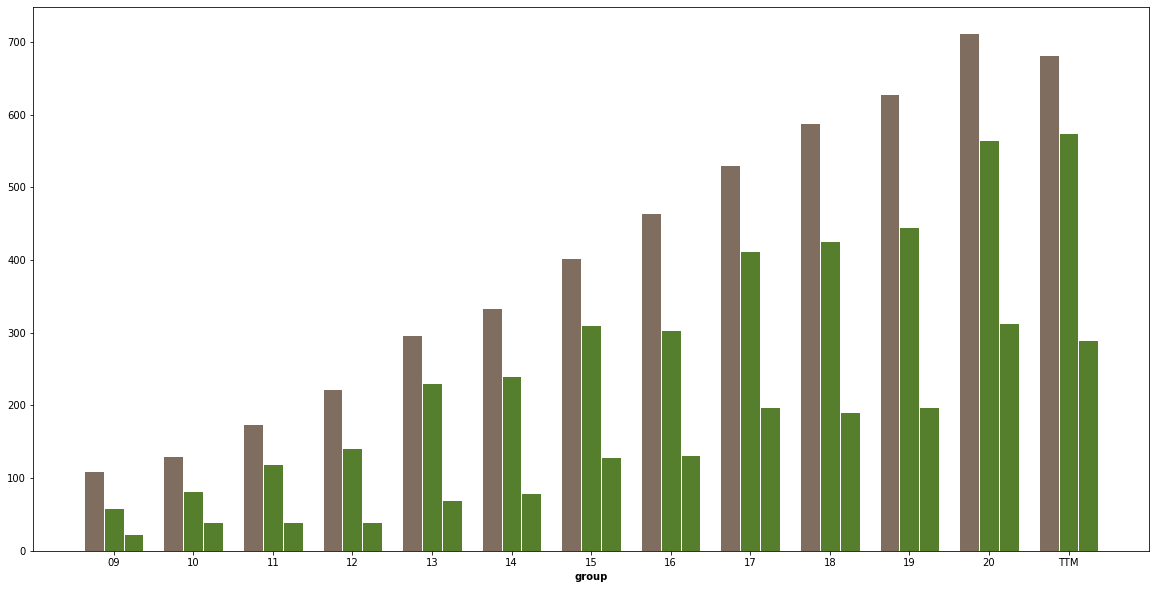

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
plt.figure(figsize=(20,10))
 
# set height of bar
bars1 = pl.sales
bars2 = pl.opt*3.3
bars3 = pl.pat*3.3
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2] 
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Sales')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Operating Profit')
plt.bar(r3, bars3, color='#557f2d', width=barWidth, edgecolor='white', label='Net Profit')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['09', '10', '11', '12', '13','14','15','16','17','18','19','20','TTM'])
 
# Create legend & Show graphic
plt.show()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


[]

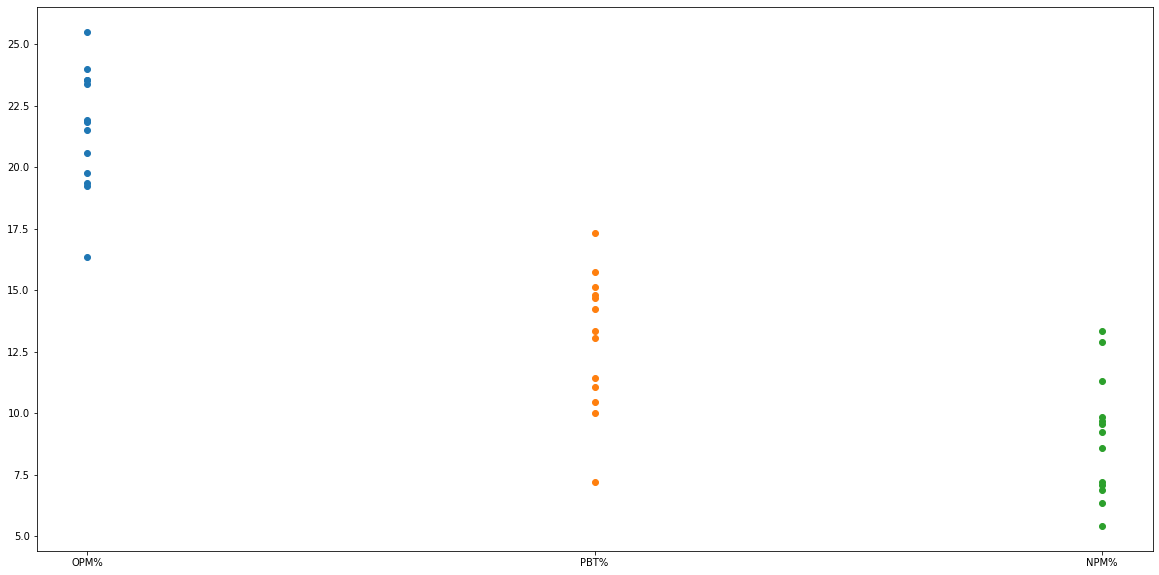

In [ ]:
opm_int=((pl.opt/pl.sales)*100).round(2)
pbt_int=((pl.pbt/pl.sales)*100).round(2)
npm_int=((pl.pat/pl.sales)*100).round(2)
plt.figure(figsize=(20,10), )
y = [opm_int,pbt_int,npm_int]
x = [1,2,3]

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

plt.xticks([1, 2, 3])
plt.axes().set_xticklabels(["OPM%","PBT%","NPM%"])

plt.plot(markersize=24)

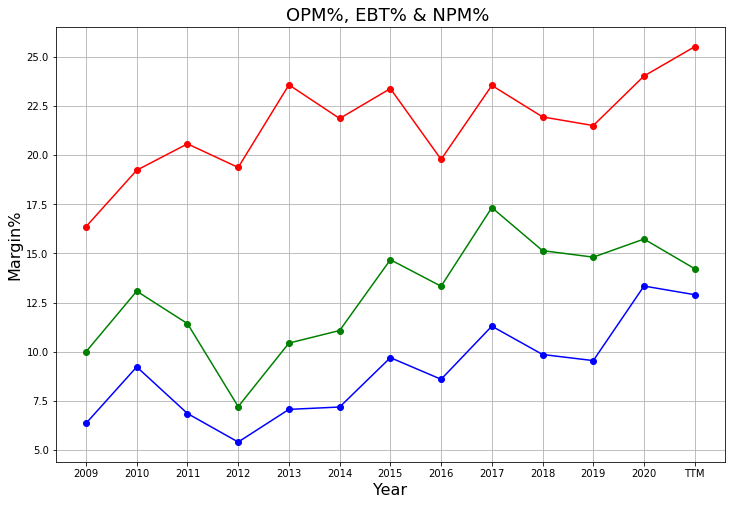

In [ ]:
Year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,'TTM']
opm= list(((pl.opt/pl.sales)*100).round(2))
pbt=list(((pl.pbt/pl.sales)*100).round(2))
pat=list(((pl.pat/pl.sales)*100).round(2))

plt.figure(figsize=(12,8))
plt.plot(Year, opm, color='red', marker='o'  )
plt.plot(Year, pbt, color='green', marker='o'  )
plt.plot(Year, pat, color='blue', marker='o'  )
plt.title('OPM%, EBT% & NPM% ', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Margin%', fontsize=16)
plt.grid(True)
plt.show()

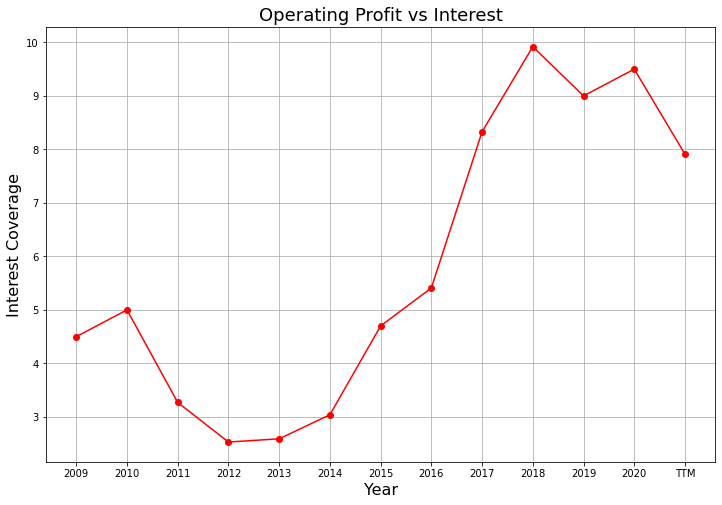

In [ ]:
Year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,'TTM']
int_covg_list = list(interest_covg)

plt.figure(figsize=(12,8))
plt.plot(Year, int_covg_list, color='red', marker='o'  )

plt.title('Operating Profit vs Interest', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Interest Coverage', fontsize=16)
plt.grid(True)
plt.show()

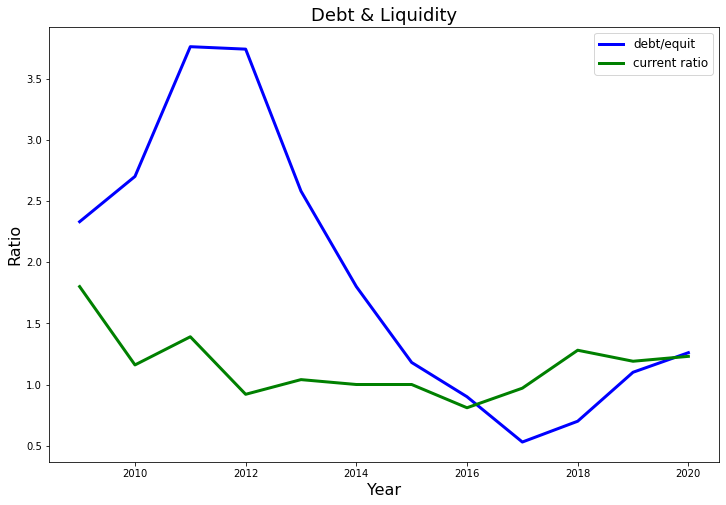

In [ ]:
Year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
d_e= list(debt_equity)
crr=list(current_ratio)


plt.figure(figsize=(12,8))
plt.plot(Year, d_e, color='blue', marker=None,linewidth=3)
plt.plot(Year, crr, color='green', marker=None,linewidth=3)

plt.title('Debt & Liquidity', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Ratio', fontsize=16,  )
plt.grid(False)
plt.legend(['debt/equit','current ratio'],fontsize=12)
plt.show()

In [ ]:
data_perc = bank_account_df.divide(bank_account_df.sum(axis=1), axis=0)

plt.stackplot(data_perc.index,
              [data_perc['basic'], data_perc['saving'],
               data_perc['money_mkt'], data_perc['credit']],
              labels=['basic', 'saving', 'money_mkt', 'credit'],
              alpha=0.8)

plt.show()

NameError: ignored

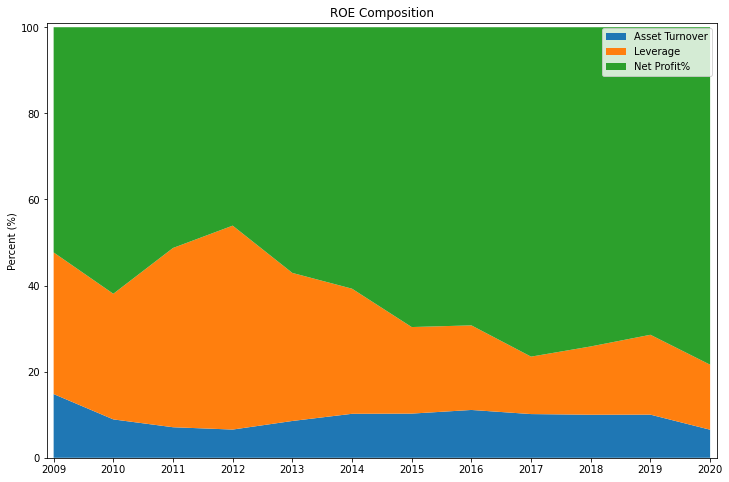

In [ ]:
import numpy

Year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,'TTM']

y = numpy.row_stack((list(nfat),list(lvg),pat))
x = numpy.array(Year)

# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y /  y.sum(axis=0).astype(float) * 100 

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.stackplot(x, percent)
ax.set_title('ROE Composition', )
ax.set_ylabel('Percent (%)')
ax.legend(['Asset Turnover','Leverage','Net Profit%'])

ax.margins(0.01, 0.01) # Set margins to avoid "whitespace"


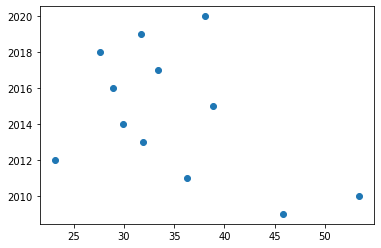

In [ ]:


# evenly sampled time at 200ms intervals
roex=np.array(((nfat* lvg * (pl.pat/pl.sales))*100).round(2)) 

# red dashes, blue squares and green triangles


Year=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
plt.scatter(roex, Year, marker='o')
plt.show()

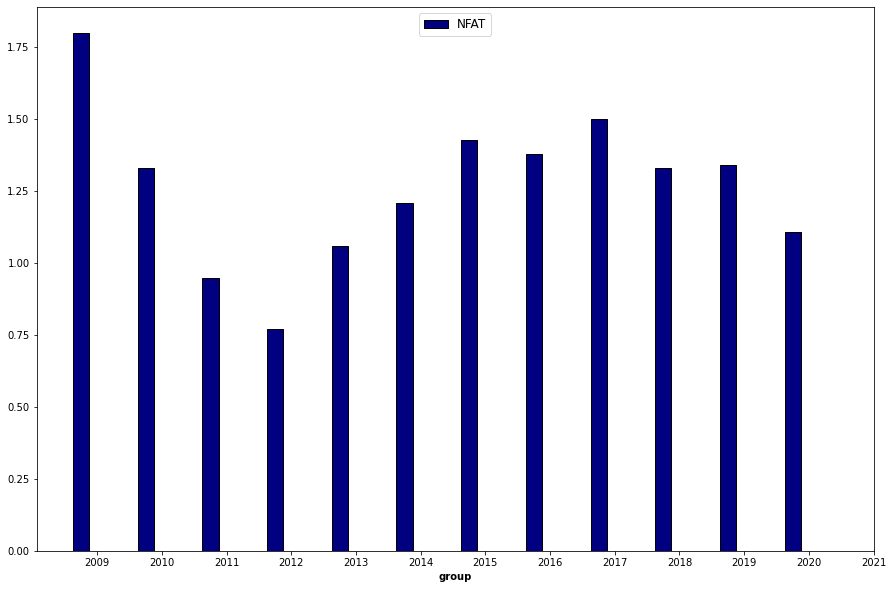

In [ ]:
barWidth = 0.25
plt.figure(figsize=(15,10))
 
# set height of bar
bars1 = nfat

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#000080', width=barWidth, edgecolor='black', label='NFAT')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], Year)
 
# Create legend & Show graphic
plt.legend(fontsize=12)
plt.show()

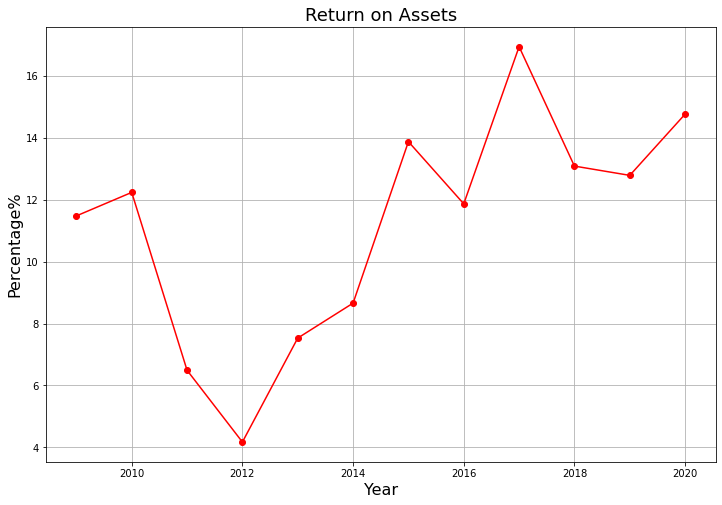

In [ ]:
rofax=(((pl.pat/bl.nfa)*100).round(2))
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,'TTM']


plt.figure(figsize=(12,8))
plt.plot(Year, rofax, color='red', marker='o'  )

plt.title('Return on Assets', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Percentage%', fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
#Borrowings Vs Assets

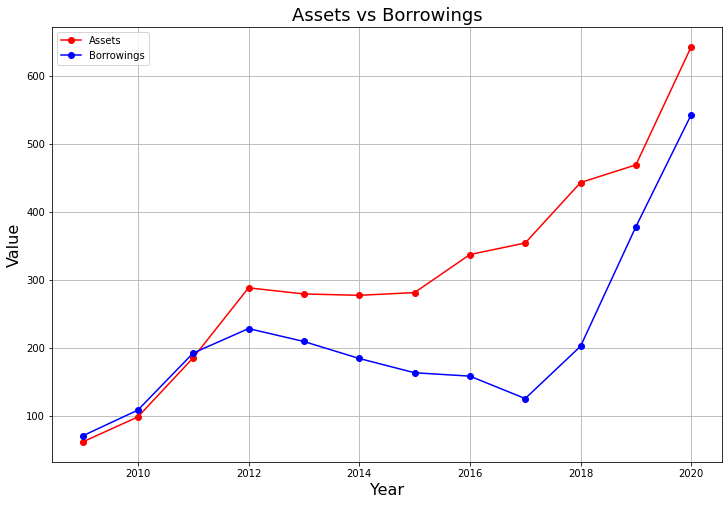

In [ ]:
ast=bl.nfa
brw=bl.Borrowings
Year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
plt.figure(figsize=(12,8))
plt.plot(Year, ast, color='red', marker='o'  )
plt.plot(Year, brw, color='blue', marker='o'  )

plt.title('Assets vs Borrowings', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid(True)
plt.legend(['Assets','Borrowings'])
plt.show()

In [ ]:
df_cfovpat_f=df_cfovpat.drop(columns='TTM')
df_cfovpat_f
df_cfovpat_f.transpose().plot.area(stacked=False,figsize=(12,8),legend=['CFO','PAT'],grid=True,xlabel='Year',ylabel='Value',title='Cash Flow from Operations Vs Net Profit')



NameError: ignored

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['CFO', 'CAPEX', 'FCF']
sizes = [df_fcf_cagr.iloc[0][0],df_fcf_cagr.iloc[1][0],df_fcf_cagr.iloc[2][0]]
  # only "explode" the 2nd slice (i.e. 'Hogs')
explode=(0.0,1.0,0.0)
fig1, ax1 = plt.subplots()

ax1.pie(sizes , explode=explode,labels=labels, autopct='%1.0f%%',shadow=True, startangle=120,radius=6,labeldistance=1.3)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

NameError: ignored

In [ ]:
df_analysis_cagr.to_excel('\Desktop.xls')

NameError: ignored

In [ ]:
from google.colab import files
df_analysis_cagr.to_excel('/Users/Haider/Desktop/Project-College/MDD/.xls') 
files.download('/Users/Haider/Desktop/Project-College/MDD/.xls')

NameError: ignored

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="Ah218ykAAxvj9jnTY3BRXS67iOnTb6+IIYKz8ehd8piOyCz0WQN0FGEGG4RhI27/laDS2jxw+PiNBq0vF2PZBwcAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjEzNTAyOTc4LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Screener.in TCS - Google Search</title><script nonce="2Ih+v0DClV+K/4PiUc57xg==">(function(){window.google={kEI:\'L9UPYM-0D4O9mAXu4rmYDg\',kEXPI:\'31\',kBL:\'CHOb\'};google.sn=\'web\';google.kHL=\'en\';})();(function(){\ngoogle.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNod
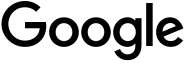

In [ ]:
import urllib.request

url = 'https://google.com/search?q=Screener.in+TCS'

# Perform the request
request = urllib.request.Request(url)

# Set a normal User Agent header, otherwise Google will block the request.
request.add_header('User-Agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36')
raw_response = urllib.request.urlopen(request).read()

# Read the repsonse as a utf-8 string
html = raw_response.decode("utf-8")
raw_response

In [ ]:
import scrapy

ModuleNotFoundError: ignored

In [ ]:
query = "screener+TCS"
query = query.replace(' ', '+')
URL = f"https://google.com/search?q={query}"

In [ ]:
USER_AGENT = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:65.0) Gecko/20100101 Firefox/65.0"
MOBILE_USER_AGENT = "Mozilla/5.0 (Linux; Android 7.0; SM-G930V Build/NRD90M) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.125 Mobile Safari/537.36"
headers = {"user-agent" : MOBILE_USER_AGENT}
resp = requests.get(URL, headers=headers)

In [ ]:
headers = {"user-agent" : MOBILE_USER_AGENT}
resp = requests.get(URL, headers=headers)

NameError: ignored

In [ ]:
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content, "html.parser")

NameError: ignored

In [ ]:
results = []
for g in soup.find_all('div', class_='r'):
    anchors = g.find_all('a')
    if anchors:
        link = anchors[0]['href']
        print(link)
        title = g.find('h3').text
        item = {
            "title": title,
            "link": link
        }
        results.append(item)


In [ ]:
pd.read_html('https://www.screener.in/company/523323/#profit-loss')[6]

,Unnamed: 0,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020
0,Share Capital +,11,11,11,11,11,11,11,11,11,11,11,11
1,Reserves,19,29,40,50,70,91,127,165,224,276,332,420
2,Borrowings,70,108,192,228,209,184,163,158,125,202,378,543
3,Other Liabilities +,20,25,41,50,55,65,85,96,103,116,129,134
4,Total Liabilities,120,174,284,339,345,351,386,430,464,605,850,1108
5,Fixed Assets +,61,98,185,288,279,277,281,337,354,443,469,643
6,CWIP,20,42,38,0,5,5,17,10,6,13,227,300
7,Investments,4,4,4,4,4,4,4,4,4,0,0,0
8,Other Assets +,36,29,57,46,57,65,85,78,100,149,153,165
9,Total Assets,120,174,284,339,345,351,386,430,464,605,850,1108


In [ ]:

pd.read_html('https://finance.yahoo.com/quote/KOVAI.BO?p=KOVAI.BO&.tsrc=fin-srch')[2]

In [ ]:
import urllib.request, json 
import pandas as pd

with urllib.request.urlopen("https://www.alphavantage.co/query?function=OVERVIEW&symbol=TCS&apikey=5LM7LCH9EGX8HV1O") as url:
    data = json.loads(url.read().decode())
data

In [ ]:
# import module 
import requests  
import bs4  
  
# Taking thecity name as an input from the user 
city = "HDFC"
  
# Generating the url   
url = "<div class="My(6px) Pos(r) smartphone_Mt(6px)" data-reactid="29"><div class="D(ib) Va(m) Maw(65%) Ov(h)" data-reactid="30"><div class="D(ib) Mend(20px)" data-reactid="31"><span class="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib) Bgc($lightRed) trendDown2" data-reactid="32">3,034.90</span><span class="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($negativeColor) Bgc($lightRed) trendDown2" data-reactid="33">-16.60 (-0.54%)</span><div id="quote-market-notice" class="C($tertiaryColor) D(b) Fz(12px) Fw(n) Mstart(0)--mobpsm Mt(6px)--mobpsm" data-reactid="34"><span data-reactid="35">As of  1:20PM IST. Market open.</span></div></div></div><div class="D(ib) Mstart(30px) Va(t) uba-container" data-reactid="36"><div id="defaultTRADENOW-sizer" class="uba-container D-n D(n)" data-reactid="37"><!-- react-text: 38 --><!-- /react-text --><div id="defaultTRADENOW-wrapper" class="" data-reactid="39"><div id="defaultdestTRADENOW" style=""></div></div></div></div></div>" 
  
# Sending HTTP request  
request_result = requests.get( url ) 
  
# Pulling HTTP data from internet  
soup = bs4.BeautifulSoup( request_result.text  
                         , "html.parser" ) 
  
# Finding temperature in Celsius. 
# The temperature is stored inside the class "BNeawe".  
temp = soup.find( "div" , class_='card card-large' )
temp

SyntaxError: ignored

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
search_item='HDFC'
res = requests.get("https://www.screener.in/company/{}".format(search_item))
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]
df

,Unnamed: 0,Dec 2017,Mar 2018,Jun 2018,Sep 2018,Dec 2018,Mar 2019,Jun 2019,Sep 2019,Dec 2019,Mar 2020,Jun 2020,Sep 2020
0,Revenue,14076,9317,9947,11246,10575,11580,12990,13487,20285,11976,13018,11728
1,Interest,5943,5956,6353,7045,7259,7182,7739,7831,7770,7662,7817,7399
2,Expenses +,2282,752,516,710,428,700,1242,1100,3337,1584,1561,766
3,Financing Profit,5852,2609,3078,3491,2888,3698,4009,4557,9179,2730,3640,3563
4,Financing Margin %,42%,28%,31%,31%,27%,32%,31%,34%,45%,23%,28%,30%
5,Other Income,12,5,5,11,7,7,6,7,6,6,2,5
6,Depreciation,13,12,13,13,27,13,29,33,42,43,35,36
7,Profit before tax,5851,2602,3070,3489,2869,3691,3985,4530,9143,2692,3607,3532
8,Tax %,9%,13%,29%,29%,26%,22%,20%,13%,8%,17%,15%,19%
9,Net Profit,5300,2257,2190,2467,2114,2862,3203,3962,8372,2233,3052,2870


In [ ]:
pd.read_html('https://in.finance.yahoo.com/quote/KOVAI.BO?p=KOVAI.BO')[6]

IndexError: ignored

In [ ]:
search_val='BHarat Seats'
text='Rate star.in'+search_val
url = "https://www.screener.in/company/KOTAKBANK/consolidated/#top"
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text, 
                         "lxml") 
soup.get("div",{"class": "name"})

In [ ]:
rom yahoo_fin import stock_info as si
quote_table = si.get_quote_table("aapl", dict_result=False)
quote_table

In [ ]:
from urllib.request import urlopen
def Info(url):
  return pd.read_html(url)[1]


def parsePrice():
  search_val='TCS' 
  text='Yahoofinance.com'+search_val+"India"
  url = 'https://google.com/search?q=' + text
  request_result=requests.get( url ) 
  soup = BeautifulSoup(request_result.text, "lxml") 
  s_val=''
  for i in range(7,len((soup.select('.kCrYT a')[0]).get('href'))):
    if (soup.select('.kCrYT a')[0]).get('href')[i]=='&':
      break
    s_val=s_val+(soup.select('.kCrYT a')[0]).get('href')[i]

  page = urlopen(s_val)
  soup = bs4.BeautifulSoup(page,"html.parser")
  price = soup.find("div",{"class": "My(6px) Pos(r) smartphone_Mt(6px)"}).find("span").text

  return Info(s_val)

print("The current price is: "+str(parsePrice()))

In [ ]:
import pandas as pd


In [ ]:
url="https://www.screener.in/company/TCS/consolidated/#profit-loss"
pl=pd.read_html(url)[1].set_index('Unnamed: 0')
bl=pd.read_html(url)[6].set_index('Unnamed: 0')
cfs=pd.read_html(url)[7].set_index('Unnamed: 0')

pl


,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,TTM
Unnamed: 0,,,,,,,,,,,,,
Sales +,27813,30029,37325,48894,62989,81809,94648,108646,117966,123104,146463,156949,160418
Expenses +,21424,21334,26146,34459,44950,56657,70167,77969,85655,90588,106957,114840,115698
Operating Profit,6388,8695,11178,14435,18040,25153,24482,30677,32311,32516,39506,42109,44720
OPM %,23%,29%,30%,30%,29%,31%,26%,28%,27%,26%,27%,27%,28%
Other Income,354,272,604,428,1178,1637,3720,3084,4221,3642,4311,4592,1723
Interest,29,16,26,22,48,39,104,33,32,52,198,924,750
Depreciation,564,661,735,918,1080,1349,1799,1888,1987,2014,2056,3529,3948
Profit before tax,6150,8290,11021,13923,18090,25402,26298,31840,34513,34092,41563,42248,41745
Tax %,14%,14%,17%,24%,22%,24%,24%,24%,24%,24%,24%,23%,NaN


Income Statement

In [ ]:
pl=pl.transpose()

# **#Cleaning and Reshaping Data**

In [ ]:
pl.head()

Unnamed: 0,Sales +,Expenses +,Operating Profit,OPM %,Other Income,Interest,Depreciation,Profit before tax,Tax %,Net Profit,EPS in Rs,Dividend Payout %
Mar 2009,27813,21424,6388,23%,354,29,564,6150,14%,5256,13.43,26%
Mar 2010,30029,21334,8695,29%,272,16,661,8290,14%,7001,17.88,56%
Mar 2011,37325,26146,11178,30%,604,26,735,11021,17%,9068,23.17,30%
Mar 2012,48894,34459,14435,30%,428,22,918,13923,24%,10413,26.60,47%
Mar 2013,62989,44950,18040,29%,1178,48,1080,18090,22%,13917,35.55,31%


In [ ]:
reset_names=["Sales\xa0+","Expenses\xa0+",'Operating Profit','OPM%','Other Income','Profit before tax','Net Profit']


In [ ]:
l1=['sales','expenses','opt','opm','oi','pbt','pat']
x=0
for i in reset_names:

  
  pl.rename(columns={i:l1[x]},inplace=True)
  x=x+1

In [ ]:
pl.rename(columns={'OPM %':'opm'},inplace=True)
pl.head()

Unnamed: 0,sales,expenses,opt,opm,oi,Interest,Depreciation,pbt,Tax %,pat,EPS in Rs,Dividend Payout %
Mar 2009,27813,21424,6388,23%,354,29,564,6150,14%,5256,13.43,26%
Mar 2010,30029,21334,8695,29%,272,16,661,8290,14%,7001,17.88,56%
Mar 2011,37325,26146,11178,30%,604,26,735,11021,17%,9068,23.17,30%
Mar 2012,48894,34459,14435,30%,428,22,918,13923,24%,10413,26.60,47%
Mar 2013,62989,44950,18040,29%,1178,48,1080,18090,22%,13917,35.55,31%


In [ ]:
change_datatype=['sales','expenses','opt','oi','Interest'	,'Depreciation', 'pbt', 'pat']	

In [ ]:

for i in change_datatype:
  pl[i] = pd.to_numeric(pl[i])


In [ ]:
pl

Unnamed: 0,sales,expenses,opt,opm,oi,Interest,Depreciation,pbt,Tax %,pat,EPS in Rs,Dividend Payout %
Mar 2009,27813,21424,6388,23%,354,29,564,6150,14%,5256,13.43,26%
Mar 2010,30029,21334,8695,29%,272,16,661,8290,14%,7001,17.88,56%
Mar 2011,37325,26146,11178,30%,604,26,735,11021,17%,9068,23.17,30%
Mar 2012,48894,34459,14435,30%,428,22,918,13923,24%,10413,26.60,47%
Mar 2013,62989,44950,18040,29%,1178,48,1080,18090,22%,13917,35.55,31%
Mar 2014,81809,56657,25153,31%,1637,39,1349,25402,24%,19164,48.92,33%
Mar 2015,94648,70167,24482,26%,3720,104,1799,26298,24%,19852,50.68,78%
Mar 2016,108646,77969,30677,28%,3084,33,1888,31840,24%,24270,61.58,35%
Mar 2017,117966,85655,32311,27%,4221,32,1987,34513,24%,26289,66.71,35%
Mar 2018,123104,90588,32516,26%,3642,52,2014,34092,24%,25826,67.46,37%


In [ ]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Mar 2009 to TTM
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sales              13 non-null     int64 
 1   expenses           13 non-null     int64 
 2   opt                13 non-null     int64 
 3   opm                13 non-null     object
 4   oi                 13 non-null     int64 
 5   Interest           13 non-null     int64 
 6   Depreciation       13 non-null     int64 
 7   pbt                13 non-null     int64 
 8   Tax %              12 non-null     object
 9   pat                13 non-null     int64 
 10  EPS in Rs          13 non-null     object
 11  Dividend Payout %  12 non-null     object
dtypes: int64(8), object(4)
memory usage: 1.9+ KB


In [ ]:
pl.rename(columns={'OPM %':'opm'},inplace=True)
pl.head()

Unnamed: 0,sales,expenses,opt,opm,oi,Interest,Depreciation,pbt,Tax %,pat,EPS in Rs,Dividend Payout %
Mar 2009,27813,21424,6388,23%,354,29,564,6150,14%,5256,13.43,26%
Mar 2010,30029,21334,8695,29%,272,16,661,8290,14%,7001,17.88,56%
Mar 2011,37325,26146,11178,30%,604,26,735,11021,17%,9068,23.17,30%
Mar 2012,48894,34459,14435,30%,428,22,918,13923,24%,10413,26.60,47%
Mar 2013,62989,44950,18040,29%,1178,48,1080,18090,22%,13917,35.55,31%


In [ ]:
#Balance Sheet

**Balance Sheet**

In [ ]:
bl=bl.transpose()
bl.head()

Unnamed: 0,Share Capital +,Reserves,Borrowings,Other Liabilities +,Total Liabilities,Fixed Assets +,CWIP,Investments,Other Assets +,Total Assets
Mar 2009,198,15502,564,6413,22577,6746,705,1614,13512,22577
Mar 2010,296,18171,103,8856,27326,6738,1017,3682,15888,27326
Mar 2011,296,24209,75,8092,32572,7479,1194,1763,22136,32572
Mar 2012,296,29284,127,11551,41157,8662,1446,1350,29698,41157
Mar 2013,296,38350,232,13154,51932,9828,1895,1897,38312,51932


In [ ]:
b_reset_names=['Share Capital\xa0+','Other Liabilities\xa0+','Total Liabilities','Fixed Assets\xa0+','CWIP','Other Assets\xa0+','Total Assets']
new_names=['sharecap','otl','tl','nfa','cwip','oa','ta']

In [ ]:
for i in range(7):
  bl.rename(columns={b_reset_names[i]:new_names[i]},inplace=True)

In [ ]:
bl.rename(columns={'ol':'otl'},inplace=True)
bl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Mar 2009 to Sep 2020
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sharecap     13 non-null     int64
 1   Reserves     13 non-null     int64
 2   Borrowings   13 non-null     int64
 3   otl          13 non-null     int64
 4   tl           13 non-null     int64
 5   nfa          13 non-null     int64
 6   cwip         13 non-null     int64
 7   Investments  13 non-null     int64
 8   oa           13 non-null     int64
 9   ta           13 non-null     int64
dtypes: int64(10)
memory usage: 1.1+ KB


In [ ]:
#Cash Flow Statement

**`Cash Flow Statement`**

In [ ]:
cfs=cfs.transpose()

In [ ]:
cfs_reset_names=['Cash from Operating Activity\xa0+','Cash from Investing Activity\xa0+','Cash from Financing Activity\xa0+','Net Cash Flow']
cf_new_names=['cfo','cfi','cff','ncf']

In [ ]:
for i in range(4):

  cfs.rename(columns={cfs_reset_names[i]:cf_new_names[i]},inplace=True)

In [ ]:
cfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Mar 2009 to Mar 2020
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cfo     12 non-null     int64
 1   cfi     12 non-null     int64
 2   cff     12 non-null     int64
 3   ncf     12 non-null     int64
dtypes: int64(4)
memory usage: 480.0+ bytes


In [ ]:
#Debt & Stability Ratios

In [ ]:
cfs


Unnamed: 0,cfo,cfi,cff,ncf
Mar 2009,5498,-3435,-1672,392
Mar 2010,7359,-5413,-2381,-435
Mar 2011,6614,-1431,-4659,524
Mar 2012,7127,-2727,-3955,445
Mar 2013,11615,-6038,-5729,-152
Mar 2014,14751,-9452,-5673,-374
Mar 2015,19369,-1807,-17168,394
Mar 2016,19109,-5010,-9666,4433
Mar 2017,25223,-16895,-11026,-2698
Mar 2018,25067,3104,-26885,1286


# **#Concatenating Data and Re-Indexing**

In [ ]:
interest_covg= pl.opt/pl.Interest
interest_covg=interest_covg.round(2)
bl.rename(columns={'sharecapital':'sharecap'},inplace=True)

In [ ]:
debt_equity=(bl.Borrowings)/(bl.sharecap+bl.Reserves)
debt_equity=debt_equity.round(2)


In [ ]:
current_ratio=bl.oa/(bl.otl)
current_ratio=current_ratio.round(2)
crr=list(current_ratio)+[None]



In [ ]:
workingcap_sales=(bl.oa-bl.otl)/pl.sales
workingcap_sales=(workingcap_sales*100).round(2)
workingcap_sales=((workingcap_sales).apply(str))+'%'


In [ ]:
indx=list((interest_covg.index))

In [ ]:
s1 = pd.Series(list(interest_covg), index=indx, name='interest_covg')
s2 = pd.Series(list(debt_equity), index=list((debt_equity.index)), name='debt_equity')

s3 = pd.Series(list(workingcap_sales), index=list((workingcap_sales.index)), name='workingcap_sales')

**Debt and Stability Raios**

In [ ]:
df_stability=pd.concat([s1, s2,s3], axis=1).transpose()


df_stability

,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,TTM,Sep 2020
interest_covg,220.28,543.44,429.92,656.14,375.83,644.95,235.4,929.61,1009.72,625.31,199.53,45.57,59.63,NaN
debt_equity,0.04,0.01,0,0,0.01,0.01,0.01,0,0,0,0,0.08,NaN,0.08
workingcap_sales,25.52%,23.42%,37.63%,37.11%,39.94%,40.76%,36.9%,32.26%,26.52%,29.34%,32.04%,27.3%,nan%,nan%


In [ ]:
opm= (((pl.opt/pl.sales)*100).round(2)).apply(str)+'%'
npm= (((pl.pat/pl.sales)*100).round(2)).apply(str)+'%'
pbt=(((pl.pbt/pl.sales)*100).round(2)).apply(str)+'%'
ebd=(((pl.pbt-pl.Depreciation/pl.sales)*100).round(2)).apply(str)+'%'


In [ ]:
indx=list(pl.index)
x1 = pd.Series(list(opm), index=list((opm.index)), name='OPM%')
x2 = pd.Series(list(pbt), index=list((pbt.index)), name='PBT%')
x3 = pd.Series(list(npm), index=list((npm.index)), name='NPM%')

In [ ]:
df_margins=pd.concat([x1, x2,x3], axis=1).transpose()


df_margins

,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,TTM
OPM%,22.97%,28.96%,29.95%,29.52%,28.64%,30.75%,25.87%,28.24%,27.39%,26.41%,26.97%,26.83%,27.88%
PBT%,22.11%,27.61%,29.53%,28.48%,28.72%,31.05%,27.79%,29.31%,29.26%,27.69%,28.38%,26.92%,26.02%
NPM%,18.9%,23.31%,24.29%,21.3%,22.09%,23.43%,20.97%,22.34%,22.29%,20.98%,21.49%,20.61%,19.47%


In [ ]:
pl.head()

Unnamed: 0,sales,expenses,opt,opm,oi,Interest,Depreciation,pbt,Tax %,pat,EPS in Rs,Dividend Payout %
Mar 2009,27813,21424,6388,23%,354,29,564,6150,14%,5256,13.43,26%
Mar 2010,30029,21334,8695,29%,272,16,661,8290,14%,7001,17.88,56%
Mar 2011,37325,26146,11178,30%,604,26,735,11021,17%,9068,23.17,30%
Mar 2012,48894,34459,14435,30%,428,22,918,13923,24%,10413,26.60,47%
Mar 2013,62989,44950,18040,29%,1178,48,1080,18090,22%,13917,35.55,31%


In [ ]:
nfat=(pl.sales/bl.nfa).round(2)


In [ ]:
lvg=(bl.ta/(bl.sharecap+bl.Reserves)).round(2)


In [ ]:
roe=(((nfat* lvg * (pl.pat/pl.sales))*100).round(2).apply(str) )+'%'

In [ ]:
indx=list(pl.index)
x1 = pd.Series(list(nfat), index=list((nfat.index)), name='Asset_Turnover')
x2 = pd.Series(lvg, index=list((lvg.index)), name='Leverage_ratio')
x3 = pd.Series(list(npm), index=list((npm.index)), name='NPM%')
x4 = pd.Series(list(roe), index=list((roe.index)), name='ROE%')



In [ ]:
df_dupont=pd.concat([x1, x2,x3,x4], axis=1).transpose()


df_dupont

,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,Sep 2020,TTM
Asset_Turnover,4.12,4.46,4.99,5.64,6.41,8.57,8.13,9.23,10.08,10.28,11.92,7.5,NaN,NaN
Leverage_ratio,1.44,1.48,1.33,1.39,1.34,1.36,1.45,1.24,1.19,1.23,1.27,1.43,1.4,NaN
NPM%,18.9%,23.31%,24.29%,21.3%,22.09%,23.43%,20.97%,22.34%,22.29%,20.98%,21.49%,20.61%,NaN,19.47%
ROE%,112.12%,153.89%,161.24%,166.96%,189.78%,273.03%,247.26%,255.67%,267.32%,265.27%,325.29%,220.99%,nan%,nan%


In [ ]:
#Yearly growth rate

In [ ]:
sales=[]
pbt=[]
opt=[]
pat=[]
indx=list(pl.index)
for i in range(1,len(indx)):
  sales.append(str((((pl.sales[i]/pl.sales[i-1])-1)*100).round(2))+'%')
  opt.append(str((((pl.opt[i]/pl.opt[i-1])-1)*100).round(2))+'%')
  pbt.append(str((((pl.pbt[i]/pl.pbt[i-1])-1)*100).round(2))+'%')
  pat.append(str((((pl.pat[i]/pl.pat[i-1]-1))*100).round(2))+'%')
indx.pop()

'TTM'

In [ ]:
x1 = pd.Series(sales, index=indx, name='Sales_growth')
x2 = pd.Series(pbt, index=indx, name='PBT_growth')
x3 = pd.Series(pat, index=indx, name='PAT_growth') 
x4= pd.Series(opt, index=indx, name='OPT_growth')


**Growth Rates**

In [ ]:
df_ygrowth=pd.concat([x1,x4, x2,x3], axis=1).transpose()


df_ygrowth

,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020
Sales_growth,7.97%,24.3%,31.0%,28.83%,29.88%,15.69%,14.79%,8.58%,4.36%,18.98%,7.16%,2.21%
OPT_growth,36.11%,28.56%,29.14%,24.97%,39.43%,-2.67%,25.3%,5.33%,0.63%,21.5%,6.59%,6.2%
PBT_growth,34.8%,32.94%,26.33%,29.93%,40.42%,3.53%,21.07%,8.4%,-1.22%,21.91%,1.65%,-1.19%
PAT_growth,33.2%,29.52%,14.83%,33.65%,37.7%,3.59%,22.25%,8.32%,-1.76%,21.86%,2.76%,-3.42%


NameError: ignored

In [ ]:
#Yearly growth rate

In [ ]:
sales=[]
pbt=[]
opt=[]
pat=[]
indx=list(pl.index)
for i in range(1,len(indx)):
  sales.append(str((((pl.sales[i]/pl.sales[i-1])-1)*100).round(2))+'%')
  opt.append(str((((pl.opt[i]/pl.opt[i-1])-1)*100).round(2))+'%')
  pbt.append(str((((pl.pbt[i]/pl.pbt[i-1])-1)*100).round(2))+'%')
  pat.append(str((((pl.pat[i]/pl.pat[i-1]-1))*100).round(2))+'%')
indx.pop()

'TTM'

In [ ]:
x1 = pd.Series(sales, index=indx, name='Sales_growth')
x2 = pd.Series(pbt, index=indx, name='PBT_growth')
x3 = pd.Series(pat, index=indx, name='PAT_growth') 
x4= pd.Series(opt, index=indx, name='OPT_growth')


**Growth Rates**

In [ ]:
df_ygrowth=pd.concat([x1,x4, x2,x3], axis=1).transpose()


df_ygrowth

,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020
Sales_growth,7.97%,24.3%,31.0%,28.83%,29.88%,15.69%,14.79%,8.58%,4.36%,18.98%,7.16%,2.21%
OPT_growth,36.11%,28.56%,29.14%,24.97%,39.43%,-2.67%,25.3%,5.33%,0.63%,21.5%,6.59%,6.2%
PBT_growth,34.8%,32.94%,26.33%,29.93%,40.42%,3.53%,21.07%,8.4%,-1.22%,21.91%,1.65%,-1.19%
PAT_growth,33.2%,29.52%,14.83%,33.65%,37.7%,3.59%,22.25%,8.32%,-1.76%,21.86%,2.76%,-3.42%


In [ ]:
cagr_indx=['10 Years', ' 5 Years', '3 Years']
s_cagr10= (pl.sales.loc['Mar 2020']/pl.sales.loc['Mar 2010'])**(1/10)-1
opt_cagr10= (pl.opt.loc['Mar 2020']/pl.opt.loc['Mar 2010'])**(1/10)-1
pbt_cagr10= (pl.pbt.loc['Mar 2020']/pl.pbt.loc['Mar 2010'])**(1/10)-1
pat_cagr10= (pl.pat.loc['Mar 2020']/pl.pat.loc['Mar 2010'])**(1/10)-1

s_cagr10=str((s_cagr10*100).round(2))+'%'
opt_cagr10=str((opt_cagr10*100).round(2))+'%'
pbt_cagr10=str((pbt_cagr10*100).round(2))+'%'
pat_cagr10=str((pat_cagr10*100).round(2))+'%'

#5 year CAGR
s_cagr5= (pl.sales.loc['Mar 2020']/pl.sales.loc['Mar 2015'])**(1/5)-1
opt_cagr5= (pl.opt.loc['Mar 2020']/pl.opt.loc['Mar 2015'])**(1/5)-1
pbt_cagr5= (pl.pbt.loc['Mar 2020']/pl.pbt.loc['Mar 2015'])**(1/5)-1
pat_cagr5= (pl.pat.loc['Mar 2020']/pl.pat.loc['Mar 2015'])**(1/5)-1

s_cagr5=str((s_cagr5*100).round(2))+'%'
opt_cagr5=str((opt_cagr5*100).round(2))+'%'

pbt_cagr5=str((pbt_cagr5*100).round(2))+'%'
pat_cagr5=str((pat_cagr5*100).round(2))+'%'

#3 year CAGR
s_cagr3= (pl.sales.loc['Mar 2020']/pl.sales.loc['Mar 2017'])**(1/3)-1
opt_cagr3= (pl.opt.loc['Mar 2020']/pl.opt.loc['Mar 2017'])**(1/3)-1
pbt_cagr3= (pl.pbt.loc['Mar 2020']/pl.pbt.loc['Mar 2017'])**(1/3)-1
pat_cagr3= (pl.pat.loc['Mar 2020']/pl.pat.loc['Mar 2017'])**(1/3)-1

s_cagr3=str((s_cagr3*100).round(2))+'%'
opt_cagr3=str((opt_cagr3*100).round(2))+'%'
pbt_cagr3=str((pbt_cagr3*100).round(2))+'%'
pat_cagr3=str((pat_cagr3*100).round(2))+'%'

z1 = pd.Series([s_cagr10,s_cagr5,s_cagr3], index=cagr_indx, name='Sales Growth%')
z2 = pd.Series([opt_cagr10,opt_cagr5,opt_cagr3], index=cagr_indx, name='OPT Growth%')
z3 = pd.Series([pbt_cagr10,pbt_cagr5,pbt_cagr3], index=cagr_indx, name='PBT Growth%')
z4 = pd.Series([pat_cagr10,pat_cagr5,pat_cagr3], index=cagr_indx, name='PAT Growth%')



	
df_cagr =pd.concat([z1, z2,z3,z4], axis=1).transpose()

In [ ]:
df_cagr

,10 Years,5 Years,3 Years
Sales Growth%,17.98%,10.64%,9.99%
OPT Growth%,17.09%,11.46%,9.23%
PBT Growth%,17.69%,9.95%,6.97%
PAT Growth%,16.54%,10.25%,7.15%


In [ ]:
indx=list(pl.index)
nfat= (pl.sales/bl.nfa).round(2)
rofa=(((pl.pat/bl.nfa)*100).round(2)).apply(str)+'%'
debt=[]
assets=[]
for i in range(1,len(indx)-1):
  debt.append(str((((bl.Borrowings[i]/bl.Borrowings[i-1])-1)*100).round(2))+'%')
  assets.append(str((((bl.nfa[i]/bl.nfa[i-1])-1)*100).round(2))+'%')

indx=list((interest_covg.index))
indx.pop()
indx.pop()
u3 = pd.Series(debt, index=indx, name='Borrowing Incr/Dcr%')
u4 = pd.Series(assets, index=indx, name='Assets Incr/Dcr%')

df_comparison=pd.concat([u3,u4], axis=1).transpose()
df_comparison





,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019
Borrowing Incr/Dcr%,-81.74%,-27.18%,69.33%,82.68%,28.02%,20.54%,-31.56%,17.96%,-14.53%,-74.9%,11038.71%
Assets Incr/Dcr%,-0.12%,11.0%,15.82%,13.46%,-2.89%,21.94%,1.17%,-0.62%,2.32%,2.65%,70.28%


In [ ]:
debt

['-81.74%',
 '-27.18%',
 '69.33%',
 '82.68%',
 '28.02%',
 '20.54%',
 '-31.56%',
 '17.96%',
 '-14.53%',
 '-74.9%',
 '11038.71%']

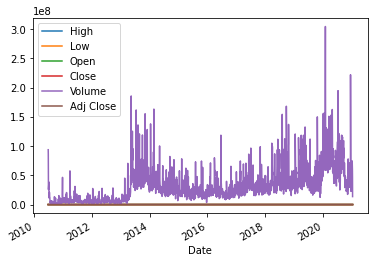

In [ ]:

import datetime
import pandas_datareader.data as web

start = datetime.datetime(2007, 1, 1)
end = datetime.datetime.now()
df = web.DataReader("TSLA", 'yahoo', start, end)


df.plot()

In [ ]:
blsheet=pd.read_html('https://www.screener.in/company/530233/#balance-sheet')[6]
blsheet

,Unnamed: 0,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,Sep 2020
0,Share Capital +,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23
1,Reserves,-1.22,-1.14,-0.94,-0.68,0.09,0.67,1.47,2.35,3.18,6.75,11.18,15.27,18.89
2,Borrowings,8.05,10.86,12.90,15.94,16.75,14.80,16.41,12.62,4.95,9.20,8.09,3.16,0.00
3,Other Liabilities +,2.68,2.48,4.09,5.22,6.75,5.14,4.67,4.49,12.45,8.23,7.97,7.68,12.48
4,Total Liabilities,15.74,18.43,22.28,26.71,29.82,26.84,28.78,25.69,26.81,30.41,33.47,32.34,37.60
5,Fixed Assets +,3.50,5.25,6.85,6.38,10.68,10.51,9.80,9.13,13.00,13.02,14.59,14.24,13.76
6,CWIP,2.10,1.87,0.65,4.43,0.00,0.06,0.82,3.33,0.23,1.07,0.12,0.12,0.32
7,Investments,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
8,Other Assets +,10.09,11.26,14.73,15.85,19.09,16.22,18.11,13.18,13.53,16.27,18.71,17.93,23.47
9,Total Assets,15.74,18.43,22.28,26.71,29.82,26.84,28.78,25.69,26.81,30.41,33.47,32.34,37.60


In [ ]:
if blsheet.shape[1]==14:
  blsheet=blsheet.iloc[:,:-1]
  

In [ ]:
blsheet

,Unnamed: 0,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020
0,Share Capital +,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23
1,Reserves,-1.22,-1.14,-0.94,-0.68,0.09,0.67,1.47,2.35,3.18,6.75,11.18,15.27
2,Borrowings,8.05,10.86,12.90,15.94,16.75,14.80,16.41,12.62,4.95,9.20,8.09,3.16
3,Other Liabilities +,2.68,2.48,4.09,5.22,6.75,5.14,4.67,4.49,12.45,8.23,7.97,7.68
4,Total Liabilities,15.74,18.43,22.28,26.71,29.82,26.84,28.78,25.69,26.81,30.41,33.47,32.34
5,Fixed Assets +,3.50,5.25,6.85,6.38,10.68,10.51,9.80,9.13,13.00,13.02,14.59,14.24
6,CWIP,2.10,1.87,0.65,4.43,0.00,0.06,0.82,3.33,0.23,1.07,0.12,0.12
7,Investments,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
8,Other Assets +,10.09,11.26,14.73,15.85,19.09,16.22,18.11,13.18,13.53,16.27,18.71,17.93
9,Total Assets,15.74,18.43,22.28,26.71,29.82,26.84,28.78,25.69,26.81,30.41,33.47,32.34


In [ ]:
pd.read_html('https://www.screener.in/company/523323/#balance-sheet')[6]

,Unnamed: 0,Mar 2009,Mar 2010,Mar 2011,Mar 2012,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020
0,Share Capital +,11,11,11,11,11,11,11,11,11,11,11,11
1,Reserves,19,29,40,50,70,91,127,165,224,276,332,420
2,Borrowings,70,108,192,228,209,184,163,158,125,202,378,543
3,Other Liabilities +,20,25,41,50,55,65,85,96,103,116,129,134
4,Total Liabilities,120,174,284,339,345,351,386,430,464,605,850,1108
5,Fixed Assets +,61,98,185,288,279,277,281,337,354,443,469,643
6,CWIP,20,42,38,0,5,5,17,10,6,13,227,300
7,Investments,4,4,4,4,4,4,4,4,4,0,0,0
8,Other Assets +,36,29,57,46,57,65,85,78,100,149,153,165
9,Total Assets,120,174,284,339,345,351,386,430,464,605,850,1108


In [ ]:
search_val='L&T Technology Services'
text='screener.in'+search_val
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text, 
                         "html.parser") 

str_val=''
  
# Iterate through the object  
# and print it as a string. 
soup.find_all('margin-0')

[]

In [ ]:
import requests
search_val='Bodal Chemicals'
text='yahoo finance'+search_val+ 'indian market'
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text,"html.parser") 

s=''

for i in range(7,len((soup.select('.kCrYT a')[0]).get('href'))):
  if (soup.select('.kCrYT a')[0]).get('href')[i]=='&':
    break
  s=s+(soup.select('.kCrYT a')[0]).get('href')[i]
request_result=requests.get( s ) 
soup = BeautifulSoup(request_result.text,"html.parser") 
soup.find_all('span')[20].text


'70.90'

In [ ]:
import pandas as pd
search_val='Bodal Chemicals'
text='yahoo finance'+search_val+ 'indian market'
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text,"html.parser") 

s=''

for i in range(7,len((soup.select('.kCrYT a')[0]).get('href'))):
  if (soup.select('.kCrYT a')[0]).get('href')[i]=='&':
    break
  s=s+(soup.select('.kCrYT a')[0]).get('href')[i]
s

'https://in.finance.yahoo.com/quote/BODALCHEM.NS/'

In [ ]:
text='yahoo finance'+search_val+'indian market'
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text,"html.parser") 

s=''

for i in range(7,len((soup.select('.kCrYT a')[0]).get('href'))):
  if (soup.select('.kCrYT a')[0]).get('href')[i]=='&':
    break
  s=s+(soup.select('.kCrYT a')[0]).get('href')[i]
s

'https://in.finance.yahoo.com/quote/BODALCHEM.NS/'

In [ ]:
text='screener.in'+search_val
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text,"html.parser") 

s=''

for i in range(7,len((soup.select('.kCrYT a')[0]).get('href'))):
	if (soup.select('.kCrYT a')[0]).get('href')[i]=='&':
		break
	s=s+(soup.select('.kCrYT a')[0]).get('href')[i]

bl=pd.read_html(s)[6]
bl.iloc[2][-1]/(bl.iloc[0][-1]+bl.iloc[1][-1])

0.13718820861678005

In [ ]:
import pandas as pd

bl=pd.read_html('https://www.screener.in/company/TCS/consolidated/#balance-sheet')[6]
if bl.shape[1]==14:
  bl=bl.iloc[:,:-1]
  

In [ ]:
bl.set_index('Unnamed: 0',inplace=True)

In [ ]:
import pandas as pd

import requests
import pandas_datareader as dr
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import bs4
search_val= 'Kovai Medical Center'
text='yahoo finance'+search_val+'indian market'+'history'
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text,"html.parser") 

s=''

for i in range(7,len((soup.select('.kCrYT a')[0]).get('href'))):
  
  if (soup.select('.kCrYT a')[0]).get('href')[i]=='&':
    break
  s=s+(soup.select('.kCrYT a')[0]).get('href')[i]


if s[-8:-1]=='history':
  symbol=s[35:-9]
else:
  symbol=s[35:-1]
symbol
price=(dr.data.get_data_yahoo(symbol,start='2008-09-23', end='2021-01-25').iloc[:,5]).to_frame()

'KOVAI.BO'

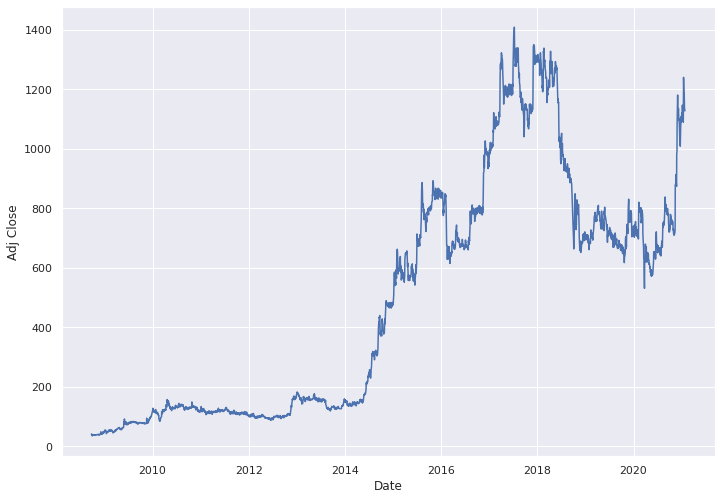

In [ ]:
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(data=price, x="Date", y="Adj Close")

In [ ]:
search_val= 'Tata consultancy services'
text='yahoo finance'+search_val+'indian market'+'history'
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text,"html.parser") 

s=''

for i in range(7,len((soup.select('.kCrYT a')[0]).get('href'))):
  if (soup.select('.kCrYT a')[0]).get('href')[i]=='&':
    break
  s=s+(soup.select('.kCrYT a')[0]).get('href')[i]
if s[-8:-1]=='history':
  symbol=s[35:-9]
else:
  symbol=s[35:-1]
symbol
price1=(dr.data.get_data_yahoo(symbol,start='2008-09-23', end='2021-01-25').iloc[:,5]).to_frame()

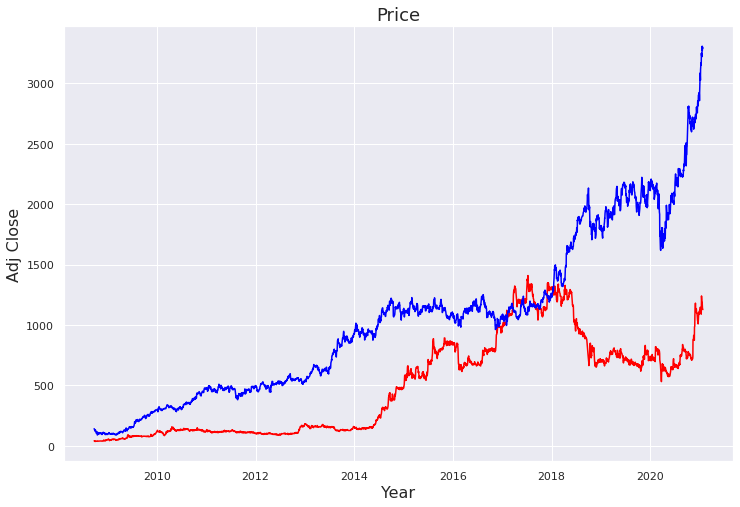

In [ ]:
Year = list(price.index)


plt.figure(figsize=(12,8))
plt.plot(Year, list(price.iloc[:,0]), color='red')
plt.plot(list(price1.index), list(price1.iloc[:,0]), color='blue')

plt.title('Price', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Adj Close', fontsize=16)
plt.grid(True)
plt.show()

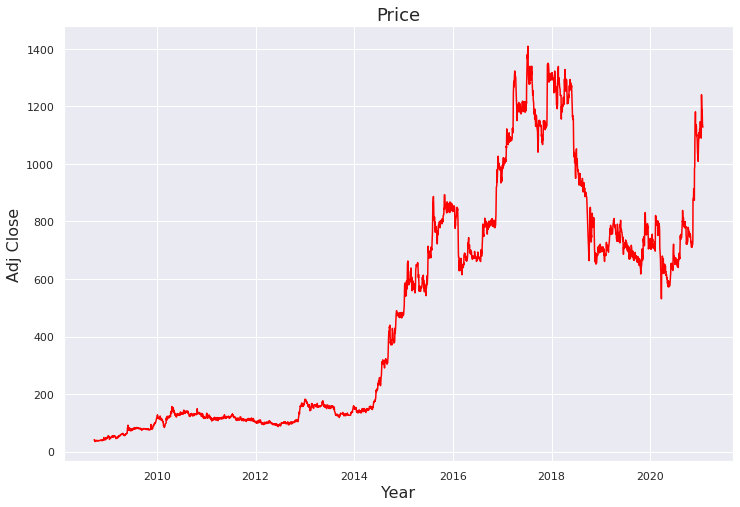

In [ ]:

import pandas as pd

import requests
import pandas_datareader as dr
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import bs4
search_val= 'Kovai Medical Center'
text='yahoo finance'+search_val+'indian market'+'history'
url = 'https://google.com/search?q=' + text
request_result=requests.get( url ) 
soup = BeautifulSoup(request_result.text,"html.parser") 

s=''

for i in range(7,len((soup.select('.kCrYT a')[0]).get('href'))):
  
  if (soup.select('.kCrYT a')[0]).get('href')[i]=='&':
    break
  s=s+(soup.select('.kCrYT a')[0]).get('href')[i]


if s[-8:-1]=='history':
  symbol=s[35:-9]
else:
  symbol=s[35:-1]
symbol
price=(dr.data.get_data_yahoo(symbol,start='2008-09-23', end='2021-01-25').iloc[:,5]).to_frame()






Year = list(price.index)


plt.figure(figsize=(12,8))
plt.plot(Year, list(price.iloc[:,0]), color='red')


plt.title('Price', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Adj Close', fontsize=16)
plt.grid(True)
plt.show()